### Viewing and Structuring the Data

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import datetime
import numpy as np

import cv2

In [2]:
img_md_subset = pd.read_csv('../data/ecotaxa_export_3857_20201203_2323.tsv', sep='\t')

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (265) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
len(img_md_subset)

25401

In [130]:
! pwd

/host/Code/deep_ifcb/python


In [4]:
cols_for_training = [
#'object_equiv_diameter',
'object_peak_fluorescence',
#'object_area',
#'object_area_over_perimeter',
#'object_biovolume',
#'object_bounding_box_xwidth',
#'object_bounding_box_ywidth',
#'object_major_axis_length',
#'object_minor_axis_length',
#'object_num_blobs',
#'object_peak_fluorescence',
'object_peak_scattering',
#'object_perimeter',
#'object_pmt_fluorescence',
#'object_pmt_scattering',
#'object_texture_average_contrast',
#'object_texture_average_gray_level',
#'object_texture_smoothness',
#'object_texture_uniformity',
]

In [5]:
cols_not_for_training = ['img_file_name',
'object_id',
'object_link',
'object_lat',
'object_lon',
'object_date',
'object_time',
'object_depth_min',
'object_depth_max',
'object_annotation_category',
'object_annotation_date',
'object_annotation_hierarchy',
'object_annotation_hierarchy.1',
'object_annotation_person_email',
'object_annotation_person_name',
'object_annotation_status',
'object_annotation_time',
'object_score',
'acq_id',
'acq_instrument',
'acq_resolution_pixels_per_micron',
'process_id',
'process_soft',
'process_soft_version',
'process_script',
'process_script_version',
'process_library',
'process_library_version',
'process_date',
'process_time',
'sample_id',
'sample_source',
'sample_flag',
'sample_cruise',
'sample_vessel',
'sample_reference',
'sample_station',
'sample_cast',
'sample_source_id', 
'sample_culture_species',
'sample_concentration',
'sample_dataportal_descriptor',                        
'object_roi_number',
'Unnamed: 0',
'index',
'merged_category',
'level_0',
'sample_experiment_state',
'sample_experiment_dilution', 
'sample_experiment_light_level',
'sample_experiment_nutrients']

### somewhat merged categories

In [6]:
# Diatoms: 

## Pennate Diatoms:
amphiprora = ['Amphiprora']                    
banquisia_belgicae = ['Banquisia belgicae']
cylindrotheca = ['Cylindrotheca']                 
licmophora = ['Licmophora']
nitzschia_frigida = ['Nitzschia frigida']             
pseudo_nitzschia_chain = ['Pseudo-Nitzschia chain'] 

unidentified_single_pennate = [
    'Membraneis',
    'Navicula',
    'temp cylindrotheca',
    'pennate 1 temp',
    'pennate 2 temp',
    'pennate 7 temp',
    'pennate 10 temp',
    'pennate 11 temp',
    'chain<pennate',
    'pennate<Bacillariophyta'
]

## Centric Diatoms
chaetoceros_mediophyceae = ['Chaetoceros<Mediophyceae']
chaetoceros_single = ['Chaetoceros single']
corethron = ['Corethron']
eucampia_chain = ['Eucampia chain']
eucampia = ['Eucampia']
dactyliosolen = ['Dactyliosolen']
odontella = ['Odontella sp.']
proboscia = ['Proboscia sp.']
rhizosolenia = ['Rhizosolenia']
unidentified_single_centric = [
    'centric 1 temp',
    'centric 2 temp',
    'centric 3 temp',
    'centric 4 temp',
    'centric 6 temp',
    'centric',
    'chain<centric'
]

# Cryptophytes: 
cryptophyta = ['Cryptophyta']

# Dinoflagellates: 
gyrodinium = ['Gyrodinium']
gymnodinium = ['Gymnodinium'] 
katodinium = ['Katodinium']
warnowia = ['Warnowia']
dinoflagellate_i = ['dinoflagellate-i']
dinoflagellate_ii = ['dinoflagellate-ii']
dinoflagellate_iii = ['dinoflagellate-iii']

dinophyceae = ['Dinophyceae']

# Prasinophytes/Chlorophytes:
pyramimonas = ['Pyramimonas']

# Haptophytes/Prymnesiophyte:
phaeocystis = ['Phaeocystis']

# Silicoflagellates:
dictyochales = ['Dictyochales']

# Microzooplankton: 
ciliophora = ['Ciliophora']
tintinnida = ['Tintinnida']

unidentified_flagellates = [ 
    't002',
    't005',
    't007',
    't009',
    't012',
    't013',
    't020'
]

unidentified_living_cells = [ 
    't006',
    't019'
]

other = [ 
    'bead',
    'bubble',
    'detritus',
    'badfocus<artefact',
    'multiple<other'
]

In [7]:
all_classes = list(img_md_subset.groupby('object_annotation_category')['object_id'].nunique().index)

In [8]:
all_classes_sep = amphiprora+banquisia_belgicae+cylindrotheca+licmophora+nitzschia_frigida+pseudo_nitzschia_chain+unidentified_single_pennate+chaetoceros_mediophyceae+chaetoceros_single+corethron+eucampia_chain+eucampia+dactyliosolen+odontella +proboscia+rhizosolenia +unidentified_single_centric+cryptophyta+gyrodinium+gymnodinium+katodinium+warnowia+dinoflagellate_i+dinoflagellate_ii +dinoflagellate_iii+dinophyceae+pyramimonas +phaeocystis+dictyochales +ciliophora +tintinnida+unidentified_flagellates+unidentified_living_cells+other
len(all_classes), len(all_classes_sep)

(60, 60)

In [9]:
list(set(all_classes) - set(all_classes_sep))

[]

In [10]:
list(set(all_classes_sep) - set(all_classes))

[]

In [11]:
class_str = 'amphiprora+banquisia_belgicae+cylindrotheca+licmophora+nitzschia_frigida+pseudo_nitzschia_chain+unidentified_single_pennate+chaetoceros_mediophyceae+chaetoceros_single+corethron+eucampia_chain+eucampia+dactyliosolen+odontella +proboscia+rhizosolenia +unidentified_single_centric+cryptophyta+gyrodinium+gymnodinium+katodinium+warnowia+dinoflagellate_i+dinoflagellate_ii +dinoflagellate_iii+dinophyceae+pyramimonas +phaeocystis+dictyochales +ciliophora +tintinnida+unidentified_flagellates+unidentified_living_cells+other'
class_str.replace('+', ',')

'amphiprora,banquisia_belgicae,cylindrotheca,licmophora,nitzschia_frigida,pseudo_nitzschia_chain,unidentified_single_pennate,chaetoceros_mediophyceae,chaetoceros_single,corethron,eucampia_chain,eucampia,dactyliosolen,odontella ,proboscia,rhizosolenia ,unidentified_single_centric,cryptophyta,gyrodinium,gymnodinium,katodinium,warnowia,dinoflagellate_i,dinoflagellate_ii ,dinoflagellate_iii,dinophyceae,pyramimonas ,phaeocystis,dictyochales ,ciliophora ,tintinnida,unidentified_flagellates,unidentified_living_cells,other'

In [12]:
class_str.replace('+', "','")

"amphiprora','banquisia_belgicae','cylindrotheca','licmophora','nitzschia_frigida','pseudo_nitzschia_chain','unidentified_single_pennate','chaetoceros_mediophyceae','chaetoceros_single','corethron','eucampia_chain','eucampia','dactyliosolen','odontella ','proboscia','rhizosolenia ','unidentified_single_centric','cryptophyta','gyrodinium','gymnodinium','katodinium','warnowia','dinoflagellate_i','dinoflagellate_ii ','dinoflagellate_iii','dinophyceae','pyramimonas ','phaeocystis','dictyochales ','ciliophora ','tintinnida','unidentified_flagellates','unidentified_living_cells','other"

### adding all the merged classes into the dataframe

In [327]:
classes = [amphiprora,banquisia_belgicae,cylindrotheca,licmophora,nitzschia_frigida,pseudo_nitzschia_chain,unidentified_single_pennate,chaetoceros_mediophyceae,chaetoceros_single,corethron,eucampia_chain,eucampia,dactyliosolen,odontella ,proboscia,rhizosolenia ,unidentified_single_centric,cryptophyta,gyrodinium,gymnodinium,katodinium,warnowia,dinoflagellate_i,dinoflagellate_ii ,dinoflagellate_iii,dinophyceae,pyramimonas ,phaeocystis,dictyochales ,ciliophora ,tintinnida,unidentified_flagellates,unidentified_living_cells,other]


In [13]:
classes = [amphiprora,banquisia_belgicae,cylindrotheca,licmophora,nitzschia_frigida,pseudo_nitzschia_chain,unidentified_single_pennate,chaetoceros_mediophyceae,chaetoceros_single,corethron,eucampia_chain,eucampia,dactyliosolen,odontella ,proboscia,rhizosolenia ,unidentified_single_centric,cryptophyta,gyrodinium,gymnodinium,katodinium,warnowia,dinoflagellate_i,dinoflagellate_ii ,dinoflagellate_iii,dinophyceae,pyramimonas ,phaeocystis,dictyochales ,ciliophora ,tintinnida,unidentified_flagellates,unidentified_living_cells,other]

class_names = ['amphiprora','banquisia_belgicae','cylindrotheca','licmophora','nitzschia_frigida','pseudo_nitzschia_chain','unidentified_single_pennate','chaetoceros_mediophyceae','chaetoceros_single','corethron','eucampia_chain','eucampia','dactyliosolen','odontella ','proboscia','rhizosolenia ','unidentified_single_centric','cryptophyta','gyrodinium','gymnodinium','katodinium','warnowia','dinoflagellate_i','dinoflagellate_ii ','dinoflagellate_iii','dinophyceae','pyramimonas ','phaeocystis','dictyochales ','ciliophora ','tintinnida','unidentified_flagellates','unidentified_living_cells','other']

img_md_subset["merged_category"] = ""
for i in range(len(classes)):
    img_md_subset['merged_category'][img_md_subset['object_annotation_category'].isin(classes[i])] = class_names[i]

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


### super merged categories

In [14]:
# Diatoms: 

## Pennate Diatoms:
pennates = [
    'Amphiprora',                    
    'Banquisia belgicae',
    'Cylindrotheca'  ,             
    'Licmophora',
    'Nitzschia frigida'  ,        
    'Pseudo-Nitzschia chain',
    'Membraneis',
    'Navicula',
    'temp cylindrotheca',
    'pennate 1 temp',
    'pennate 2 temp',
    'pennate 7 temp',
    'pennate 10 temp',
    'pennate 11 temp',
    'chain<pennate',
    'pennate<Bacillariophyta'
]

## Centric Diatoms
centrics = [
    'Chaetoceros<Mediophyceae',
    'Chaetoceros single',
    'Corethron',
    'Eucampia chain',
    'Eucampia',
    'Dactyliosolen',
    'Odontella sp.',
    'Proboscia sp.',
    'Rhizosolenia',
    'centric 1 temp',
    'centric 2 temp',
    'centric 3 temp',
    'centric 4 temp',
    'centric 6 temp',
    'centric',
    'chain<centric'
]

# Cryptophytes: 
cryptophyta = ['Cryptophyta']

dinoflagellates = [
    'Gyrodinium',
    'Gymnodinium',
    'Katodinium',
    'Warnowia',
    'dinoflagellate-i',
    'dinoflagellate-ii',
    'dinoflagellate-iii',
    'Dinophyceae'
]

# Prasinophytes/Chlorophytes:
pyramimonas = ['Pyramimonas']

# Haptophytes/Prymnesiophyte:
phaeocystis = ['Phaeocystis']

# Silicoflagellates:
dictyochales = ['Dictyochales']

# Microzooplankton: 
ciliophora = ['Ciliophora']
tintinnida = ['Tintinnida']

unidentified_flagellates = [ 
    't002',
    't005',
    't007',
    't009',
    't012',
    't013',
    't020'
]

unidentified_living_cells = [ 
    't006',
    't019'
]

other = [ 
    'bead',
    'bubble',
    'detritus',
    'badfocus<artefact',
    'multiple<other'
]

In [15]:
all_classes = list(img_md_subset.groupby('object_annotation_category')['object_id'].nunique().index)

In [16]:
all_classes_sep = pennates+centrics+cryptophyta+dinoflagellates+pyramimonas+phaeocystis+dictyochales+ciliophora+tintinnida+unidentified_flagellates+unidentified_living_cells+other
len(all_classes), len(all_classes_sep)

(60, 60)

In [17]:
list(set(all_classes) - set(all_classes_sep))

[]

In [18]:
list(set(all_classes_sep) - set(all_classes))

[]

In [19]:
class_str = 'pennates+centrics+cryptophyta+dinoflagellates+pyramimonas+phaeocystis+dictyochales+ciliophora+tintinnida+unidentified_flagellates+unidentified_living_cells+other'
class_str.replace('+', ',')

'pennates,centrics,cryptophyta,dinoflagellates,pyramimonas,phaeocystis,dictyochales,ciliophora,tintinnida,unidentified_flagellates,unidentified_living_cells,other'

In [20]:
class_str.replace('+', "','")

"pennates','centrics','cryptophyta','dinoflagellates','pyramimonas','phaeocystis','dictyochales','ciliophora','tintinnida','unidentified_flagellates','unidentified_living_cells','other"

### adding all the merged classes into the dataframe

In [21]:
classes = [pennates,centrics,cryptophyta,dinoflagellates,pyramimonas,phaeocystis,dictyochales,ciliophora,tintinnida,unidentified_flagellates,unidentified_living_cells,other]

class_names = ['pennates','centrics','cryptophyta','dinoflagellates','pyramimonas','phaeocystis','dictyochales','ciliophora','tintinnida','unidentified_flagellates','unidentified_living_cells','other']

img_md_subset["merged_category"] = ""
for i in range(len(classes)):
    img_md_subset['merged_category'][img_md_subset['object_annotation_category'].isin(classes[i])] = class_names[i]

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [22]:
img_md_subset[['object_annotation_category','merged_category']]

,object_annotation_category,merged_category
0,Ciliophora,ciliophora
1,Ciliophora,ciliophora
2,Ciliophora,ciliophora
3,Ciliophora,ciliophora
4,Ciliophora,ciliophora
5,Ciliophora,ciliophora
6,Ciliophora,ciliophora
7,Tintinnida,tintinnida
8,Ciliophora,ciliophora
9,Ciliophora,ciliophora


### For now only using validated images

In [14]:
#img_md_subset = img_md_subset[img_md_subset.object_annotation_status == 'validated']

rare_count = 400

unique_validated = img_md_subset[img_md_subset.object_annotation_status == 'validated'].groupby('object_annotation_category')['object_id'].nunique()

rare_classes = unique_validated[unique_validated <= rare_count]

#val_img_subset = val_img_subset[val_img_subset['object_annotation_category'].isin(list(rare_classes.index))]
rare_classes

object_annotation_category
Banquisia belgicae          64
Chaetoceros single         295
Corethron                  116
Dictyochales               167
Dinophyceae                165
Eucampia                   141
Eucampia chain              97
Gymnodinium                263
Gyrodinium                 166
Licmophora                 148
Membraneis                 256
Navicula                   353
Odontella sp.               80
Proboscia sp.              243
Rhizosolenia               140
Tintinnida                  50
Warnowia                    53
bubble                     352
centric                    142
centric 4 temp             364
centric 6 temp             262
dinoflagellate-i           353
dinoflagellate-iii         270
pennate<Bacillariophyta     57
t006                        68
t007                       234
t009                       147
t012                       376
t013                       340
t019                       301
t020                       211
temp cylindr

#### drop all unwanted classes

In [15]:
# drop unwanted classes

# Here are groups we can cut:
classes_to_drop = ['Banquisia belgicae',
'Dinophyceae',
'pennate<Bacillariophyta',
'Licmophora',
'Rhizosolenia',
'centric 4 temp',
'centric 6 temp',
't005',
't006',
't009',
't019',
't020',
'Warnowia']

img_md_subset = img_md_subset.drop(img_md_subset[img_md_subset.object_annotation_category.isin(classes_to_drop)].index)
len(img_md_subset)

22933

In [16]:
# Here are groups we can combine:

img_md_subset[img_md_subset.object_annotation_category == 'Tintinnida'] = 'Ciliophora'
img_md_subset[img_md_subset.object_annotation_category == 'Odontella sp.'] = 'chain<centric'
img_md_subset[img_md_subset.object_annotation_category == 'Eucampia chain'] = 'chain<centric'
len(img_md_subset)

22933

#### Filter this data to only use validated and other filters TODO

In [17]:
val_subset = img_md_subset[img_md_subset.object_annotation_status == 'validated']
len(val_subset)

22706

#### Getting Images Organized

In [18]:
import glob, os

fn_list = []
for file in glob.glob("../../../Data/all_imagery/*.png"):
    fn_list.append(file)
    
print(len(fn_list))

fn_edit = [x[26:-4] for x in fn_list]

5806675


Only use data where we have both labels and imagery

In [20]:
val_img_subset = val_subset[val_subset['object_id'].isin(fn_edit)]
len(val_img_subset)

22585

Only use classes with `min_count` or more samples

In [21]:
min_count = 20


unique_validated = val_img_subset[val_img_subset.object_annotation_status == 'validated'].groupby('object_annotation_category')['object_id'].nunique()

sufficient_classes = unique_validated[unique_validated >= min_count]

val_img_subset = val_img_subset[val_img_subset['object_annotation_category'].isin(list(sufficient_classes.index))]

In [22]:
val_img_subset.head()

,object_id,object_lat,object_lon,object_date,object_time,object_link,object_depth_min,object_depth_max,object_annotation_status,object_annotation_person_name,...,process_script,process_script_version,process_library,process_library_version,process_date,process_time,acq_id,acq_instrument,acq_resolution_pixels_per_micron,merged_category
0,D20170905T132200_IFCB107_00007,43.736,-43.009,20170905,132200,NaN,5,5,validated,NaN,...,easyIFCB,870c8428659f37e17e280fd213b07c0b1a692b86,ifcb-analysis,e9e37998a8bb8caf587b19418202b650ba0b99f2-durty,20170927,220000,IFCB107,IFCB,3.4,ciliophora
1,D20170904T161256_IFCB107_00002,42.387,-42.947,20170904,161256,NaN,5,5,validated,NaN,...,easyIFCB,870c8428659f37e17e280fd213b07c0b1a692b86,ifcb-analysis,e9e37998a8bb8caf587b19418202b650ba0b99f2-durty,20170927,220000,IFCB107,IFCB,3.4,ciliophora
2,D20170904T172259_IFCB107_00004,42.384,-42.931,20170904,172259,NaN,5,5,validated,NaN,...,easyIFCB,870c8428659f37e17e280fd213b07c0b1a692b86,ifcb-analysis,e9e37998a8bb8caf587b19418202b650ba0b99f2-durty,20170927,220000,IFCB107,IFCB,3.4,ciliophora
3,D20170904T183300_IFCB107_00002,42.378,-42.916,20170904,183300,NaN,5,5,validated,NaN,...,easyIFCB,870c8428659f37e17e280fd213b07c0b1a692b86,ifcb-analysis,e9e37998a8bb8caf587b19418202b650ba0b99f2-durty,20170927,220000,IFCB107,IFCB,3.4,ciliophora
4,D20170905T015820_IFCB107_00003,42.371,-42.89,20170905,15820,NaN,5,5,validated,NaN,...,easyIFCB,870c8428659f37e17e280fd213b07c0b1a692b86,ifcb-analysis,e9e37998a8bb8caf587b19418202b650ba0b99f2-durty,20170927,220000,IFCB107,IFCB,3.4,ciliophora


In [23]:
with pd.option_context('display.max_rows', 200):
    print(val_img_subset[val_img_subset.object_annotation_status == 'validated'].groupby('object_annotation_category')['object_id'].nunique())

object_annotation_category
Amphiprora                   491
Chaetoceros single           295
Chaetoceros<Mediophyceae     739
Ciliophora                   405
Corethron                    116
Cryptophyta                 1193
Cylindrotheca                443
Dactyliosolen                436
Dictyochales                 167
Eucampia                     141
Gymnodinium                  263
Gyrodinium                   166
Katodinium                   454
Membraneis                   256
Navicula                     353
Nitzschia frigida            834
Phaeocystis                 1020
Proboscia sp.                243
Pseudo-Nitzschia chain      1045
Pyramimonas                  897
badfocus<artefact           1194
bead                         534
bubble                       352
centric                      142
centric 1 temp               595
centric 2 temp               859
centric 3 temp               448
chain<centric                562
chain<pennate                531
detritus        

In [24]:
class_id_list = [[x, i] for i, x in enumerate(list(sufficient_classes.index))]
class_id_dict = {key: value for (key, value) in class_id_list}

id_class_dict = dict((v,k) for k,v in class_id_dict.items())

class_id_dict

{'Amphiprora': 0,
 'Chaetoceros single': 1,
 'Chaetoceros<Mediophyceae': 2,
 'Ciliophora': 3,
 'Corethron': 4,
 'Cryptophyta': 5,
 'Cylindrotheca': 6,
 'Dactyliosolen': 7,
 'Dictyochales': 8,
 'Eucampia': 9,
 'Gymnodinium': 10,
 'Gyrodinium': 11,
 'Katodinium': 12,
 'Membraneis': 13,
 'Navicula': 14,
 'Nitzschia frigida': 15,
 'Phaeocystis': 16,
 'Proboscia sp.': 17,
 'Pseudo-Nitzschia chain': 18,
 'Pyramimonas': 19,
 'badfocus<artefact': 20,
 'bead': 21,
 'bubble': 22,
 'centric': 23,
 'centric 1 temp': 24,
 'centric 2 temp': 25,
 'centric 3 temp': 26,
 'chain<centric': 27,
 'chain<pennate': 28,
 'detritus': 29,
 'dinoflagellate-i': 30,
 'dinoflagellate-ii': 31,
 'dinoflagellate-iii': 32,
 'multiple<other': 33,
 'pennate 1 temp': 34,
 'pennate 10 temp': 35,
 'pennate 11 temp': 36,
 'pennate 2 temp': 37,
 'pennate 7 temp': 38,
 't002': 39,
 't007': 40,
 't012': 41,
 't013': 42,
 'temp cylindrotheca': 43}

In [25]:
buckets = {}
for key in id_class_dict:
    buckets[key] = 0

object_ids = []

max_count = 1000

# TODO need to somehow prioritize the undersampled classes first or they might only consist of the highly available ones
# this might be easier if merge them after this step...
for index, row in val_img_subset.iterrows():
    if buckets[class_id_dict[row['object_annotation_category']]] < max_count:
        object_ids.append(row['object_id'])
        buckets[class_id_dict[row['object_annotation_category']]] += 1
len(object_ids)

22133

In [26]:
balanced_df = val_img_subset[val_img_subset['object_id'].isin(object_ids)]
balanced_df.head()

,object_id,object_lat,object_lon,object_date,object_time,object_link,object_depth_min,object_depth_max,object_annotation_status,object_annotation_person_name,...,process_script,process_script_version,process_library,process_library_version,process_date,process_time,acq_id,acq_instrument,acq_resolution_pixels_per_micron,merged_category
0,D20170905T132200_IFCB107_00007,43.736,-43.009,20170905,132200,NaN,5,5,validated,NaN,...,easyIFCB,870c8428659f37e17e280fd213b07c0b1a692b86,ifcb-analysis,e9e37998a8bb8caf587b19418202b650ba0b99f2-durty,20170927,220000,IFCB107,IFCB,3.4,ciliophora
1,D20170904T161256_IFCB107_00002,42.387,-42.947,20170904,161256,NaN,5,5,validated,NaN,...,easyIFCB,870c8428659f37e17e280fd213b07c0b1a692b86,ifcb-analysis,e9e37998a8bb8caf587b19418202b650ba0b99f2-durty,20170927,220000,IFCB107,IFCB,3.4,ciliophora
2,D20170904T172259_IFCB107_00004,42.384,-42.931,20170904,172259,NaN,5,5,validated,NaN,...,easyIFCB,870c8428659f37e17e280fd213b07c0b1a692b86,ifcb-analysis,e9e37998a8bb8caf587b19418202b650ba0b99f2-durty,20170927,220000,IFCB107,IFCB,3.4,ciliophora
3,D20170904T183300_IFCB107_00002,42.378,-42.916,20170904,183300,NaN,5,5,validated,NaN,...,easyIFCB,870c8428659f37e17e280fd213b07c0b1a692b86,ifcb-analysis,e9e37998a8bb8caf587b19418202b650ba0b99f2-durty,20170927,220000,IFCB107,IFCB,3.4,ciliophora
4,D20170905T015820_IFCB107_00003,42.371,-42.89,20170905,15820,NaN,5,5,validated,NaN,...,easyIFCB,870c8428659f37e17e280fd213b07c0b1a692b86,ifcb-analysis,e9e37998a8bb8caf587b19418202b650ba0b99f2-durty,20170927,220000,IFCB107,IFCB,3.4,ciliophora


In [27]:
len(balanced_df)

22133

## Run the Model

### Preprocess for Keras

Load all data into memory, may not work at full size

In [28]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

Using TensorFlow backend.


['/job:localhost/replica:0/task:0/device:GPU:0']

In [211]:
from tensorflow.keras.preprocessing import image
import numpy as np

images = []
labels = []
merged_labels = []
original_labels = []
flu_data = []
object_ids_training = []


for index, row in balanced_df.sample(frac=1).iterrows():
    
    # TODO need to think about optimal size and that size actually corresponds to class

    #img = image.load_img('../../../Data/all_imagery/'+row['object_id']+'.png', target_size=(150, 150), color_mode="grayscale")
    
    # instead of interpolating increasing to max dimension and then padding
    # see https://stackoverflow.com/questions/47697622/cnn-image-resizing-vs-padding-keeping-aspect-ratio-or-not/49882055#49882055
    # based on https://jdhao.github.io/2017/11/06/resize-image-to-square-with-padding/
    desired_size = 150
    im = cv2.imread('../../../Data/all_imagery/'+row['object_id']+'.png', cv2.IMREAD_GRAYSCALE)
    old_size = im.shape[:2] # old_size is in (height, width) format
    ratio = float(desired_size)/max(old_size)
    new_size = tuple([int(x*ratio) for x in old_size])
    # new_size should be in (width, height) format
    im = cv2.resize(im, (new_size[1], new_size[0]))
    delta_w = desired_size - new_size[1]
    delta_h = desired_size - new_size[0]
    top, bottom = delta_h//2, delta_h-(delta_h//2)
    left, right = delta_w//2, delta_w-(delta_w//2)
    new_im = cv2.copyMakeBorder(im, 0, delta_h, 0, delta_w, cv2.BORDER_CONSTANT,0)
    img = new_im[..., np.newaxis]
    
    images.append(img)
    
    labels.append(class_id_dict[row['object_annotation_category']])
    #merged_labels.append(row['merged_category'])
    original_labels.append(row['object_annotation_category'])
    #flu_data.append([row['object_pmt_fluorescence'], row['object_peak_fluorescence']]) 
    # changes this to add all handcrafted features to the data as a vector
    flu_data.append(np.array(row[balanced_df.columns.isin(cols_for_training)].values, dtype=np.float64))
    #flu_data.append(np.array(row[~balanced_df.columns.isin(cols_not_for_training)].values, dtype=np.float32))
    object_ids_training.append(row['object_id'])
    
images = np.array(images)
labels = np.array(labels)
#merged_labels = np.array(merged_labels)
original_labels = np.array(original_labels)
flu_data = np.array(flu_data)
object_ids_training = np.array(object_ids_training)

In [216]:
images.shape, labels.shape, flu_data.shape

((22133, 150, 150, 1), (22133,), (22133, 2))

In [213]:
# for Random Forest
# labels = labels[~np.any(np.isnan(flu_data), axis=1)]
# object_ids_training = object_ids_training[~np.any(np.isnan(flu_data), axis=1)]
# flu_data = flu_data[~np.any(np.isnan(flu_data), axis=1)]

In [214]:
flu_data.shape

(22133, 2)

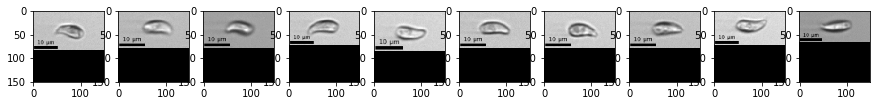

In [215]:
fig, ax = plt.subplots(1,10, figsize=(15,10))
j = 0
for i in range(10,20):
    ax[j].imshow(images[original_labels == 'Cryptophyta'][i,:,:,0], cmap = 'gray')
    j+=1

In [217]:
from tensorflow import keras

from sklearn.model_selection import train_test_split

num_classes = len(class_id_dict)

test_size = 0.20

X_train, X_test, flu_train, flu_test, ids_train, ids_test, y_train, y_test = train_test_split(images, flu_data, object_ids_training, labels, test_size=test_size, random_state=42, stratify=labels)
#flu_train, flu_test, ids_train, ids_test, y_train, y_test = train_test_split(flu_data, object_ids_training, labels, test_size=test_size, random_state=42, stratify=labels)




# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

X_train.shape, flu_train.shape, X_test.shape

((17706, 150, 150, 1), (17706, 2), (4427, 150, 150, 1))

### Oversample the X_train classes where y_train label N with slight augmentation.

In [218]:
np.unique(np.argmax(y_train, axis=1), return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43]),
 array([393, 236, 591, 324,  93, 800, 354, 349, 134, 113, 210, 133, 363,
        205, 282, 667, 800, 194, 800, 718, 800, 427, 282, 114, 476, 687,
        358, 450, 425, 718, 282, 579, 216, 442, 369, 427, 457, 474, 463,
        446, 187, 301, 272, 295]))

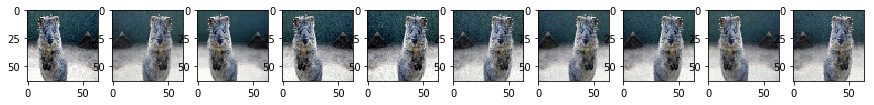

In [223]:
import imgaug as ia
import imgaug.augmenters as iaa


ia.seed(1)

# Example batch of images.
# The array has shape (32, 64, 64, 3) and dtype uint8.
images = np.array(
    [ia.quokka(size=(64, 64)) for _ in range(32)],
    dtype=np.uint8
)

seq = iaa.Sequential([
    iaa.Fliplr(0.5), # horizontal flips
    #iaa.Flipud(0.5),
    #iaa.Crop(percent=(0, 0.1)), # random crops
    # Small gaussian blur with random sigma between 0 and 0.5.
    # But we only blur about 50% of all images.
    iaa.Sometimes(
        0.1,
        iaa.GaussianBlur(sigma=(0, 0.2))
    ),
    # Strengthen or weaken the contrast in each image.
    iaa.LinearContrast((0.9, 1.1)),
    # Add gaussian noise.
    # For 50% of all images, we sample the noise once per pixel.
    # For the other 50% of all images, we sample the noise per pixel AND
    # channel. This can change the color (not only brightness) of the
    # pixels.
    iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.05*255), per_channel=0.5),
    # Make some images brighter and some darker.
    # In 20% of all cases, we sample the multiplier once per channel,
    # which can end up changing the color of the images.
    #iaa.Multiply((0.8, 1.2), per_channel=0.2),
    # Apply affine transformations to each image.
    # Scale/zoom them, translate/move them, rotate them and shear them.
    #iaa.Affine(
    #    scale={"x": (0.8, 1.2), "y": (0.8, 1.2)},
    #    translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)},
    #    rotate=(-25, 25),
    #    shear=(-8, 8)
    #)
], random_order=True) # apply augmenters in random order

images_aug = seq(images=images)
fig, ax = plt.subplots(1,10, figsize=(15,10))
for i in range(10):
    ax[i].imshow(images_aug[i])


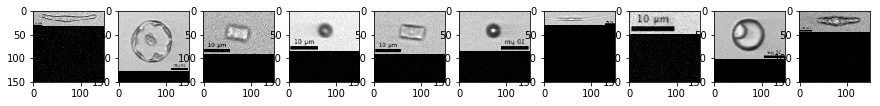

In [224]:
images_aug = seq(images=X_train[:20])
fig, ax = plt.subplots(1,10, figsize=(15,10))
for i in range(10):
    ax[i].imshow(images_aug[i,:,:,0], cmap = 'gray')

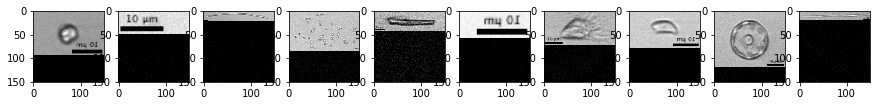

In [225]:
images_aug = seq(images=X_train[1000:1020])
fig, ax = plt.subplots(1,10, figsize=(15,10))
for i in range(10):
    ax[i].imshow(images_aug[i,:,:,0], cmap = 'gray')

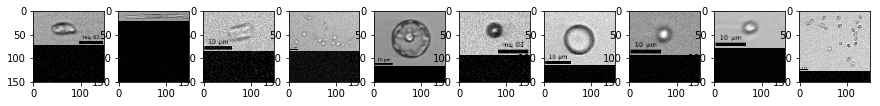

In [226]:
images_aug = seq(images=X_train[5000:5020])
fig, ax = plt.subplots(1,10, figsize=(15,10))
for i in range(10):
    ax[i].imshow(images_aug[i,:,:,0], cmap = 'gray')

In [227]:
import random

y_train_argmax = np.argmax(y_train, axis=1)

#train_count = int((1-test_size) * max_count)
max_count = 700
train_count = max_count

# take the image and augment it and add it to a stack and add the label to another stack and the concat them to the main stacks
class_labels, count_of_classes = np.unique(y_train_argmax, return_counts=True)
list_of_all_images = []
list_of_all_flu_data = []
list_of_all_labs = []
for l, c in enumerate(count_of_classes):
    #print(l)
    list_of_class_images = []
    list_of_class_labs = []
    list_of_class_flu_data = []
    if c < train_count:
        num_to_aug = train_count - c
        all_im_of_class = X_train[y_train_argmax == l]
        all_flu_of_class = flu_train[y_train_argmax == l]
        for i in range(0,num_to_aug):
            im_idx = random.randint(0, all_im_of_class.shape[0]-1)
            im = all_im_of_class[im_idx,:,:,:]
            flu = all_flu_of_class[im_idx,:]
            im = seq(image=im)
            # augmenting the flu data but not sure this is ideal
            flu = flu*random.uniform(0.9, 1.1)
            list_of_class_images.append(im)
            list_of_class_labs.append(l)
            list_of_class_flu_data.append(flu)
    list_of_all_images = list_of_all_images + list_of_class_images
    list_of_all_labs = list_of_all_labs + list_of_class_labs
    list_of_all_flu_data = list_of_all_flu_data + list_of_class_flu_data

In [228]:
list_of_all_labs = np.array(list_of_all_labs)
one_hot = np.zeros((list_of_all_labs.size, list_of_all_labs.max()+1))
one_hot[np.arange(list_of_all_labs.size),list_of_all_labs] = 1
y_train.shape, one_hot.shape

((17706, 44), (13530, 44))

In [229]:
# add these new images into the training data
X_train = np.concatenate((X_train, np.array(list_of_all_images)), axis=0)
y_train = np.concatenate((y_train, one_hot))

In [230]:
list_of_all_flu_data = np.array(list_of_all_flu_data)
flu_train = np.concatenate((flu_train, list_of_all_flu_data), axis=0)

In [231]:
X_train.shape, flu_train.shape, y_train.shape

((31236, 150, 150, 1), (31236, 2), (31236, 44))

### Must normalize the data or training results are erratic!

In [232]:
np.mean(X_train), np.std(X_train), np.mean(X_test), np.std(X_test)

(69.26152252955991, 70.94987459557065, 66.61351143237206, 71.91690517970162)

In [233]:
#np.mean(flu_train[:,0]), np.std(flu_train[:,0])

In [234]:
# replace nan values with mean values from each column

In [235]:
#Obtain mean of columns as you need, nanmean is convenient.
col_mean = np.nanmean(flu_train, axis=0)

#Find indices that you need to replace
inds = np.where(np.isnan(flu_train))

#Place column means in the indices. Align the arrays using take
flu_train[inds] = np.take(col_mean, inds[1])

In [236]:
# scale the train and test flu data
# TODO need to save this fit scaler out to reuse
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(flu_train)
flu_train = scaler.transform(flu_train)
flu_test = scaler.transform(flu_test)

In [237]:
feat_ind = 0
np.min(flu_train[:,feat_ind]), np.max(flu_train[:,feat_ind]), \
    np.mean(flu_train[:,feat_ind]), np.std(flu_train[:,feat_ind])

(-0.6121690301634719,
 5.3068636295312155,
 -3.1773789643671018e-15,
 0.9999999999999974)

In [238]:
np.min(flu_test[:,feat_ind]), np.max(flu_test[:,feat_ind]), \
    np.mean(flu_test[:,feat_ind]), np.std(flu_test[:,feat_ind])

(-0.6113561767016517,
 4.771265682964186,
 -0.09543777915743373,
 0.9327899847259332)

In [239]:
X_train = X_train / 130
X_test = X_test / 130
np.mean(X_train), np.std(X_train), np.mean(X_test), np.std(X_test)

(0.5327809425350872, 0.5457682661197862, 0.512411626402862, 0.5532069629207921)

In [240]:
np.unique(y_train, return_counts=True), np.unique(y_test, return_counts=True)

((array([0., 1.]), array([1343148,   31236])),
 (array([0., 1.], dtype=float32), array([190361,   4427])))

#### shuffle input data

In [241]:
from sklearn.utils import shuffle
X_train, flu_train, y_train = shuffle(X_train, flu_train, y_train)

Train RF Model

In [119]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier()
clf.fit(flu_train, y_train)

/usr/local/lib/python3.5/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [242]:
input_shape = X_train.shape[1:]
flu_input_shape = flu_train.shape[1:]
batch_size = 40

epochs = 50

input_shape, flu_input_shape

((150, 150, 1), (2,))

In [243]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Input, Concatenate, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint

### Medium Complexity Model

In [244]:
inputs = Input(shape=input_shape)
#input_flu = Input(shape=flu_input_shape)

x = Conv2D(32, (3, 3), padding='same', activation='relu')(inputs)
x = Conv2D(32, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)

x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)

x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)

x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)

# switch to functional and concat the other features here before the dense layer

x = Flatten()(x)
#x = Concatenate(axis=-1)([x, input_flu])
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(num_classes, activation='softmax')(x)

#model = Model([inputs,input_flu], output)
model = Model([inputs], output)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 150, 150, 1)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 150, 150, 32)      320       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 148, 148, 32)      9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 74, 74, 64)        18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 72, 72, 64)        36928     
__________

In [245]:
checkpoint = ModelCheckpoint('../model_weights_all_classes_100221_2.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]


# Fit the model on the batches generated by datagen.flow().
model.compile(loss=keras.losses.categorical_crossentropy,
          optimizer=keras.optimizers.Adadelta(),
          metrics=['accuracy'])

# history = model.fit(x=[X_train, flu_train], y=y_train, 
#                     batch_size=batch_size,
#                     epochs=epochs,
#                     verbose=1,
#                     validation_data=([X_test,flu_test], y_test),
#                     callbacks=callbacks_list)

history = model.fit(x=[X_train], y=y_train, 
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=([X_test], y_test),
                    callbacks=callbacks_list)

Train on 31236 samples, validate on 4427 samples
Epoch 1/50
31200/31236 [============================>.] - ETA: 0s - loss: 2.4564 - acc: 0.3073
Epoch 00001: val_acc improved from -inf to 0.58166, saving model to ../model_weights_all_classes_100221_2.hdf5
31236/31236 [==============================] - 38s 1ms/step - loss: 2.4560 - acc: 0.3074 - val_loss: 1.4621 - val_acc: 0.5817
Epoch 2/50
31200/31236 [============================>.] - ETA: 0s - loss: 1.2911 - acc: 0.6110
Epoch 00002: val_acc improved from 0.58166 to 0.73119, saving model to ../model_weights_all_classes_100221_2.hdf5
31236/31236 [==============================] - 36s 1ms/step - loss: 1.2911 - acc: 0.6112 - val_loss: 0.9161 - val_acc: 0.7312
Epoch 3/50
31160/31236 [============================>.] - ETA: 0s - loss: 0.9272 - acc: 0.7205
Epoch 00003: val_acc improved from 0.73119 to 0.76417, saving model to ../model_weights_all_classes_100221_2.hdf5
31236/31236 [==============================] - 36s 1ms/step - loss: 0.9273 

KeyboardInterrupt: 

In [ ]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model acc')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
#experiment.log_figure(figure=plt, figure_name="model_acc")
plt.savefig("../modelacc.png", dpi=300)
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
#experiment.log_figure(figure=plt, figure_name="model_loss")
plt.savefig("../modelloss.png", dpi=300)
plt.show()

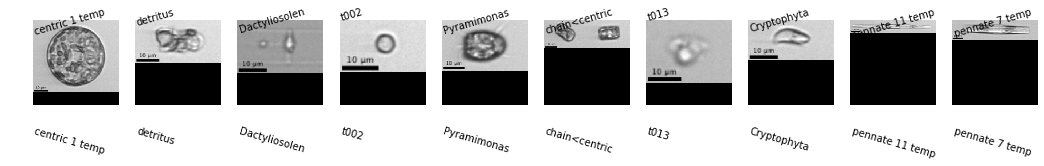

In [246]:
fig, ax = plt.subplots(1, 10, figsize=(18, 10))

indices = np.random.randint(len(X_test), size=(10))
#predictions = np.argmax(model.predict([X_test[indices], flu_test[indices]]), axis=1)
predictions = np.argmax(model.predict([X_test[indices]]), axis=1)
labs = np.argmax(y_test[indices], axis=1)

for i in range(0, 10):
    ax[i].imshow(X_test[indices[i]].reshape((150, 150)), cmap = 'gray')
    ax[i].axis('off')
    ax[i].text(0,-10, id_class_dict[labs[i]], rotation=16)
    
    ax[i].text(0,200, id_class_dict[predictions[i]],rotation=-16)
plt.show()

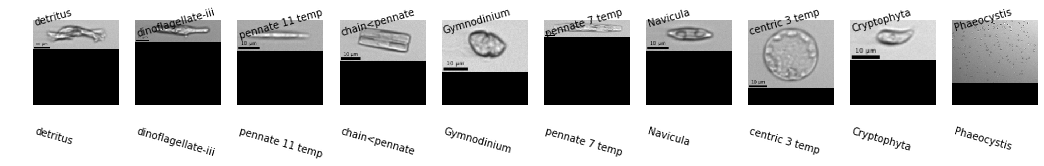

In [247]:
fig, ax = plt.subplots(1, 10, figsize=(18, 10))

indices = np.random.randint(len(X_test), size=(10))
#predictions = np.argmax(model.predict([X_test[indices], flu_test[indices]]), axis=1)
predictions = np.argmax(model.predict([X_test[indices]]), axis=1)
labs = np.argmax(y_test[indices], axis=1)

for i in range(0, 10):
    ax[i].imshow(X_test[indices[i]].reshape((150, 150)), cmap = 'gray')
    ax[i].axis('off')
    ax[i].text(0,-10, id_class_dict[labs[i]], rotation=16)
    
    ax[i].text(0,200, id_class_dict[predictions[i]],rotation=-16)
plt.show()

In [248]:
#predictions = np.argmax(model.predict([X_test, flu_test]), axis=1)
predictions = np.argmax(model.predict([X_test]), axis=1)
labs = np.argmax(y_test, axis=1)

In [249]:
class_id_dict = {'Amphiprora': 0,
 'Chaetoceros single': 1,
 'Chaetoceros<Mediophyceae': 2,
 'Ciliophora': 3,
 'Corethron': 4,
 'Cryptophyta': 5,
 'Cylindrotheca': 6,
 'Dactyliosolen': 7,
 'Dictyochales': 8,
 'Eucampia': 9,
 'Gymnodinium': 10,
 'Gyrodinium': 11,
 'Katodinium': 12,
 'Membraneis': 13,
 'Navicula': 14,
 'Nitzschia frigida': 15,
 'Phaeocystis': 16,
 'Proboscia sp.': 17,
 'Pseudo-Nitzschia chain': 18,
 'Pyramimonas': 19,
 'badfocus<artefact': 20,
 'bead': 21,
 'bubble': 22,
 'centric': 23,
 'centric 1 temp': 24,
 'centric 2 temp': 25,
 'centric 3 temp': 26,
 'chain<centric': 27,
 'chain<pennate': 28,
 'detritus': 29,
 'dinoflagellate-i': 30,
 'dinoflagellate-ii': 31,
 'dinoflagellate-iii': 32,
 'multiple<other': 33,
 'pennate 1 temp': 34,
 'pennate 10 temp': 35,
 'pennate 11 temp': 36,
 'pennate 2 temp': 37,
 'pennate 7 temp': 38,
 't002': 39,
 't007': 40,
 't012': 41,
 't013': 42,
 'temp cylindrotheca': 43}

id_class_dict = dict((v,k) for k,v in class_id_dict.items())
list(id_class_dict)

[id_class_dict[i] for i in range(len(id_class_dict))]

['Amphiprora',
 'Chaetoceros single',
 'Chaetoceros<Mediophyceae',
 'Ciliophora',
 'Corethron',
 'Cryptophyta',
 'Cylindrotheca',
 'Dactyliosolen',
 'Dictyochales',
 'Eucampia',
 'Gymnodinium',
 'Gyrodinium',
 'Katodinium',
 'Membraneis',
 'Navicula',
 'Nitzschia frigida',
 'Phaeocystis',
 'Proboscia sp.',
 'Pseudo-Nitzschia chain',
 'Pyramimonas',
 'badfocus<artefact',
 'bead',
 'bubble',
 'centric',
 'centric 1 temp',
 'centric 2 temp',
 'centric 3 temp',
 'chain<centric',
 'chain<pennate',
 'detritus',
 'dinoflagellate-i',
 'dinoflagellate-ii',
 'dinoflagellate-iii',
 'multiple<other',
 'pennate 1 temp',
 'pennate 10 temp',
 'pennate 11 temp',
 'pennate 2 temp',
 'pennate 7 temp',
 't002',
 't007',
 't012',
 't013',
 'temp cylindrotheca']

Text(0.5, 331.09999999999985, 'Predicted label')

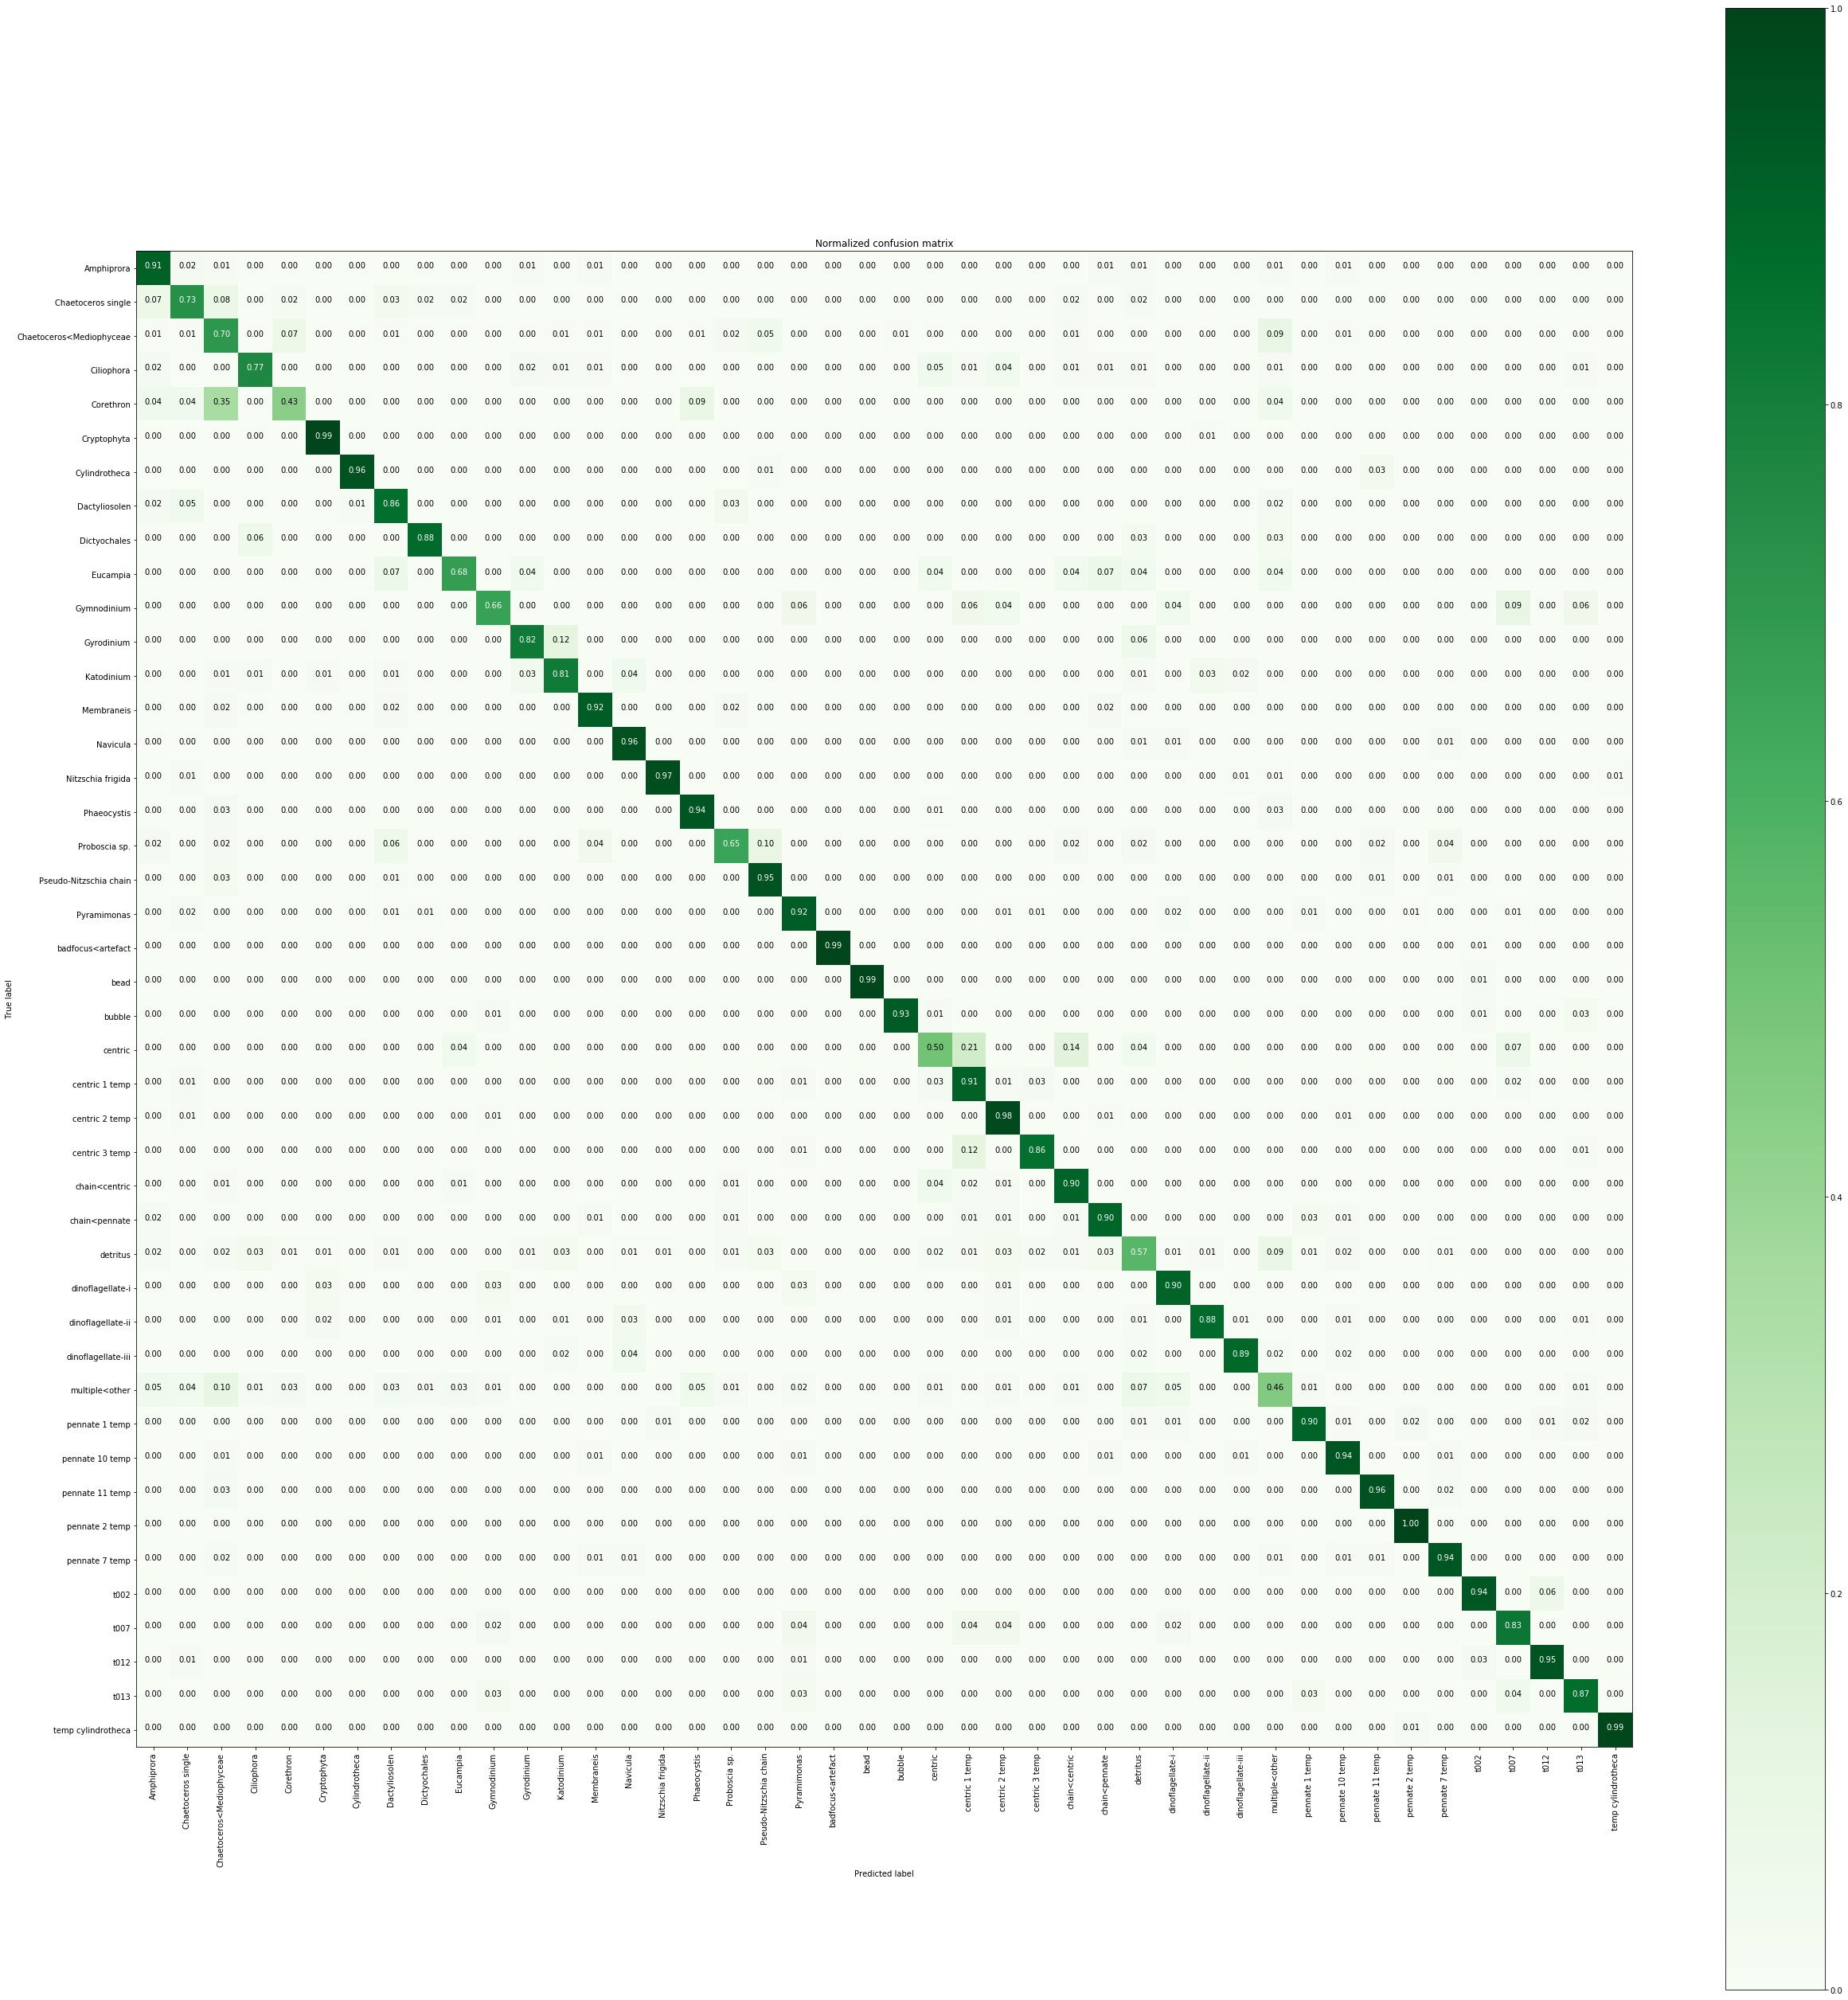

In [250]:
from sklearn.metrics import confusion_matrix
import itertools

Y_val_pred = predictions
Y_val_real = labs
cm = confusion_matrix(Y_val_real, Y_val_pred)
cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

# print(cm)
plt.figure(figsize=(35,35)) 

plt.imshow(cm, cmap = 'Greens')
plt.title('Normalized confusion matrix')
plt.colorbar()
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, [id_class_dict[i] for i in range(len(id_class_dict))], rotation=90)
plt.yticks(tick_marks, [id_class_dict[i] for i in range(len(id_class_dict))])

fmt = '.2f'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

#plt.savefig("full_model_conf_matrix.png", dpi=300)
#plt.axis('off')
#plt.grid(b=None, which='major', axis='both')

ValueError: Error when checking model input: the list of Numpy arrays that you are passing to your model is not the size the model expected. Expected to see 1 array(s), but instead got the following list of 2 arrays: [array([[[[0.8769231 ],
         [0.8769231 ],
         [0.86153847],
         ...,
         [0.86923075],
         [0.9076923 ],
         [0.9076923 ]],

        [[0.8769231 ],
         [0.8769231 ],...

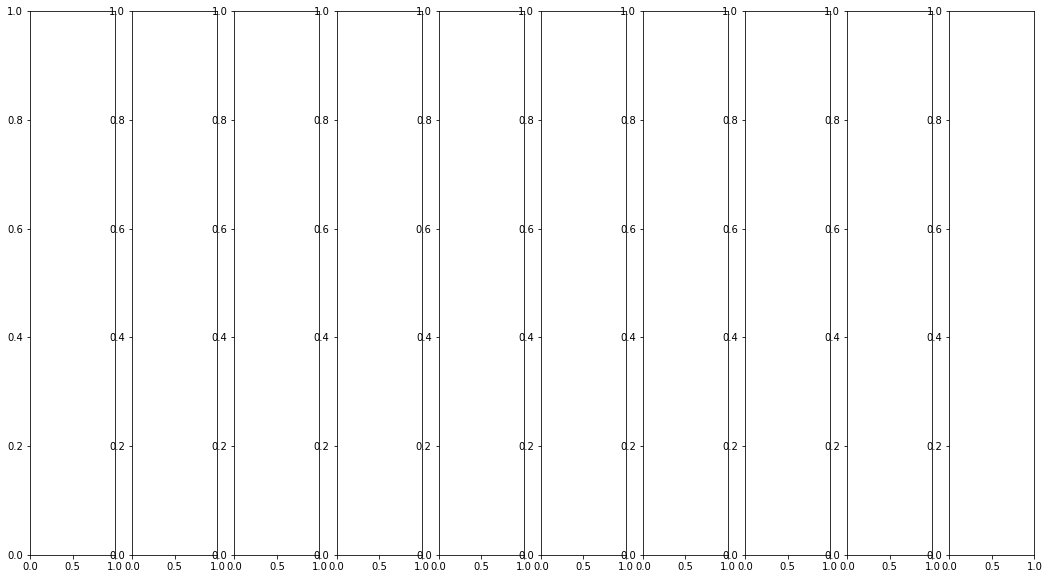

In [58]:
fig, ax = plt.subplots(1, 10, figsize=(18, 10))

indices = np.random.randint(len(X_test), size=(10))
predictions = np.argmax(model.predict([X_test[indices], flu_test[indices]]), axis=1)
labs = np.argmax(y_test[indices], axis=1)

for i in range(0, 10):
    ax[i].imshow(X_test[indices[i]].reshape((150, 150)), cmap = 'gray')
    ax[i].axis('off')
    ax[i].text(0,-10, id_class_dict[labs[i]], rotation=16)
    
    ax[i].text(0,200, id_class_dict[predictions[i]],rotation=-16)
plt.show()

In [ ]:
# TODO gauge model confidence by the predicted class

In [281]:
from tensorflow import keras

model = keras.models.load_model('../model_weights_all_classes_100221_2.hdf5')

In [282]:
val_img_subset[val_img_subset.object_annotation_status == 'validated'].groupby('object_annotation_category')['object_id'].nunique()

object_annotation_category
Amphiprora                   491
Chaetoceros single           295
Chaetoceros<Mediophyceae     739
Ciliophora                   405
Corethron                    116
Cryptophyta                 1193
Cylindrotheca                443
Dactyliosolen                436
Dictyochales                 167
Eucampia                     141
Gymnodinium                  263
Gyrodinium                   166
Katodinium                   454
Membraneis                   256
Navicula                     353
Nitzschia frigida            834
Phaeocystis                 1020
Proboscia sp.                243
Pseudo-Nitzschia chain      1045
Pyramimonas                  897
badfocus<artefact           1194
bead                         534
bubble                       352
centric                      142
centric 1 temp               595
centric 2 temp               859
centric 3 temp               448
chain<centric                562
chain<pennate                531
detritus        

In [283]:
# go through each initial class and find out accuracy of how often that is in the correct merged class

In [284]:
class_id_dict

{'Amphiprora': 0,
 'Chaetoceros single': 1,
 'Chaetoceros<Mediophyceae': 2,
 'Ciliophora': 3,
 'Corethron': 4,
 'Cryptophyta': 5,
 'Cylindrotheca': 6,
 'Dactyliosolen': 7,
 'Dictyochales': 8,
 'Eucampia': 9,
 'Gymnodinium': 10,
 'Gyrodinium': 11,
 'Katodinium': 12,
 'Membraneis': 13,
 'Navicula': 14,
 'Nitzschia frigida': 15,
 'Phaeocystis': 16,
 'Proboscia sp.': 17,
 'Pseudo-Nitzschia chain': 18,
 'Pyramimonas': 19,
 'badfocus<artefact': 20,
 'bead': 21,
 'bubble': 22,
 'centric': 23,
 'centric 1 temp': 24,
 'centric 2 temp': 25,
 'centric 3 temp': 26,
 'chain<centric': 27,
 'chain<pennate': 28,
 'detritus': 29,
 'dinoflagellate-i': 30,
 'dinoflagellate-ii': 31,
 'dinoflagellate-iii': 32,
 'multiple<other': 33,
 'pennate 1 temp': 34,
 'pennate 10 temp': 35,
 'pennate 11 temp': 36,
 'pennate 2 temp': 37,
 'pennate 7 temp': 38,
 't002': 39,
 't007': 40,
 't012': 41,
 't013': 42,
 'temp cylindrotheca': 43}

### running these on proper val data and not including train

In [285]:
len(val_img_subset)

22585

In [286]:
val_img_subset = val_img_subset.reset_index()

ValueError: cannot insert level_0, already exists

In [287]:
val_img_subset = val_img_subset.set_index('object_id')
#img_md_subset.update(new_val.set_index('object_id')[['object_annotation_status', 'object_annotation_category']])
# this is effectively an upsert operation like in SQL
val_img_subset_only_test = val_img_subset[val_img_subset.index.isin(ids_test)]
val_img_subset_only_test = val_img_subset_only_test.reset_index()
val_img_subset = val_img_subset.reset_index()

In [288]:
len(val_img_subset_only_test)

4427

In [289]:
val_img_subset_only_test.groupby('object_annotation_category')['object_id'].nunique()

object_annotation_category
Amphiprora                   98
Chaetoceros single           59
Chaetoceros<Mediophyceae    148
Ciliophora                   81
Corethron                    23
Cryptophyta                 200
Cylindrotheca                89
Dactyliosolen                87
Dictyochales                 33
Eucampia                     28
Gymnodinium                  53
Gyrodinium                   33
Katodinium                   91
Membraneis                   51
Navicula                     71
Nitzschia frigida           167
Phaeocystis                 200
Proboscia sp.                49
Pseudo-Nitzschia chain      200
Pyramimonas                 179
badfocus<artefact           200
bead                        107
bubble                       70
centric                      28
centric 1 temp              119
centric 2 temp              172
centric 3 temp               90
chain<centric               112
chain<pennate               106
detritus                    179
dinoflagellat

In [290]:
#val_img_subset_only_test = pd.read_csv('../../../Data/fresh_data_012121/ecotaxa_export_live_validated_schuyler_010221.csv')

In [303]:
from tensorflow.keras.preprocessing import image
import numpy as np

names = []
accs = []
counts = []
all_labs = []
all_preds = []

for name, group in val_img_subset_only_test.groupby('object_annotation_category')['object_id']:
    #print('*** ',name)    
    images = []
    labels = []
    flus = []

    for fn in group:

        # TODO need to think about optimal size and that size actually corresponds to class
        # maybe add blackspace instead of interpolating because it is changing the morphology

        #img = image.load_img('../../../Data/all_imagery/'+fn+'.png', target_size=(150, 150), color_mode="grayscale")

        # instead of interpolating increasing to max dimension and then padding
        # see https://stackoverflow.com/questions/47697622/cnn-image-resizing-vs-padding-keeping-aspect-ratio-or-not/49882055#49882055
        # based on https://jdhao.github.io/2017/11/06/resize-image-to-square-with-padding/
        desired_size = 150
        im = cv2.imread('../../../Data/all_imagery/'+fn+'.png', cv2.IMREAD_GRAYSCALE)
        old_size = im.shape[:2] # old_size is in (height, width) format
        ratio = float(desired_size)/max(old_size)
        new_size = tuple([int(x*ratio) for x in old_size])
        # new_size should be in (width, height) format
        im = cv2.resize(im, (new_size[1], new_size[0]))
        delta_w = desired_size - new_size[1]
        delta_h = desired_size - new_size[0]
        top, bottom = delta_h//2, delta_h-(delta_h//2)
        left, right = delta_w//2, delta_w-(delta_w//2)
        new_im = cv2.copyMakeBorder(im, 0, delta_h, 0, delta_w, cv2.BORDER_CONSTANT,0)
        img = new_im[..., np.newaxis]

        images.append(img)
        mc = val_img_subset[val_img_subset.object_id == fn].object_annotation_category
        pmt = val_img_subset[val_img_subset.object_id == fn].object_pmt_fluorescence
        peak = val_img_subset[val_img_subset.object_id == fn].object_peak_fluorescence
        labels.append(class_id_dict[mc.values[0]])
        #flus.append([pmt.values[0], peak.values[0]]) 
        flus.append(np.array(val_img_subset[val_img_subset.object_id == fn].iloc[0][val_img_subset.columns.isin(cols_for_training)].values, dtype=np.float64))
        
    images = np.array(images)
    labels = np.array(labels)
    #flus = np.array(flus)

    #flus = scaler.transform(flus)
    X_predict = images / 130
    #print('normed mean and std: ', np.mean(X_predict), np.std(X_predict))
    
    #predictions = np.argmax(model.predict([X_predict, flus]), axis=1)
    predictions = np.argmax(model.predict([X_predict]), axis=1)
    #print(np.count_nonzero(labels==predictions), len(labels))
    #print('accuracy:', np.count_nonzero(labels==predictions)/len(labels))
    names.append(name)
    accs.append(np.count_nonzero(labels==predictions)/len(labels))
    counts.append(len(labels))
    all_labs += list(labels)
    all_preds += list(predictions)
    #print('------')
    
    


In [304]:
### for RF Model

In [305]:
#val_img_subset_only_test = val_img_subset_only_test.drop(val_img_subset_only_test[val_img_subset_only_test.object_annotation_category.isin(['Unknowns'])].index)

In [306]:
# flu_data = []
# labels = []
# for index, row in val_img_subset_only_test.iterrows():
#     flu_data.append(np.array(row[~val_img_subset_only_test.columns.isin(cols_not_for_training)].values, dtype=np.float32))
#     labels.append(class_id_dict[row['object_annotation_category']])

In [307]:
#val_img_subset_only_test

In [308]:
# flu_data = np.array(flu_data)
# labels = np.array(labels)

# labels = labels[~np.any(np.isnan(flu_data), axis=1)]
# flu_data = flu_data[~np.any(np.isnan(flu_data), axis=1)]

In [309]:
# all_labs = clf.predict(np.array(flu_data))
# all_preds = np.array(labels)

In [310]:
classes, counts = np.unique(all_preds, return_counts=True)
true_classes, true_counts = np.unique(all_labs, return_counts=True)

In [311]:
classes, counts = np.unique(all_preds, return_counts=True)
print(len(counts))

44


In [312]:
! pwd

/host/Code/deep_ifcb/python


In [313]:
classes, counts = np.unique(all_preds, return_counts=True)
true_classes, true_counts = np.unique(all_labs, return_counts=True)

filled_counts = []
prev_class = -1
i = 0
while len(filled_counts) < len(id_class_dict):
    if i >= len(classes):
        filled_counts.append(0)
        prev_class += 1
    elif classes[i] != 1+prev_class:
        filled_counts.append(0)
        prev_class += 1
    else:
        filled_counts.append(counts[i])
        i += 1
        prev_class += 1
    
filled_true_counts = []
prev_class = -1
i = 0
while len(filled_true_counts) < len(id_class_dict):
    if i >= len(true_classes):
        filled_true_counts.append(0)
        prev_class += 1
    elif true_classes[i] != 1+prev_class:
        filled_true_counts.append(0)
        prev_class += 1
    else:
        filled_true_counts.append(true_counts[i])
        i += 1
        prev_class += 1

In [314]:
from sklearn.metrics import precision_recall_fscore_support

precision_recall_fscore_support(np.array(all_labs), np.array(all_preds), average='weighted', labels=list(id_class_dict.keys()))

(0.8883955383780845, 0.8872825841427603, 0.886615345697907, None)

In [315]:
from sklearn.metrics import precision_recall_fscore_support

"""
returns:

precision float (if average is not None) or array of float, shape = [n_unique_labels]
recall float (if average is not None) or array of float, , shape = [n_unique_labels]
fbeta_score float (if average is not None) or array of float, shape = [n_unique_labels]
support None (if average is not None) or array of int, shape = [n_unique_labels]
    The number of occurrences of each label in y_true.
"""

precision, recall, fscore, supports = precision_recall_fscore_support(np.array(all_labs), np.array(all_preds), 
                                average=None, labels=list(id_class_dict.keys()))

In [316]:
len(list(id_class_dict.keys()))

44

In [317]:
len(precision)

44

In [318]:
names = [id_class_dict[x] for x in list(id_class_dict.keys())]

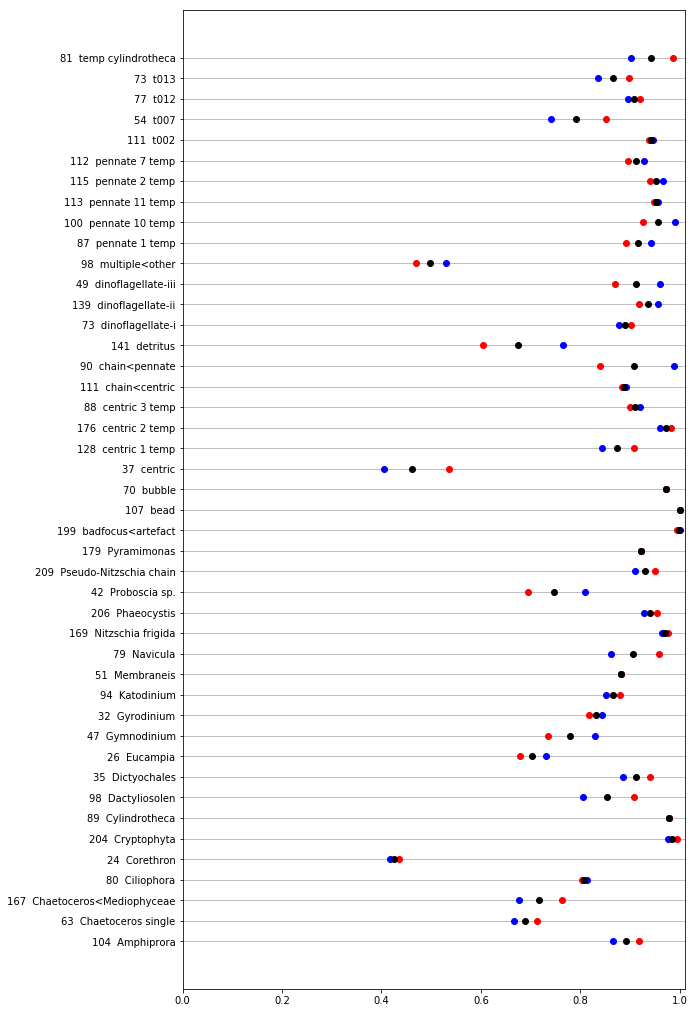

In [319]:
nc = [str(n) + '  ' + m for m,n in zip(names,counts)]

fig, ax = plt.subplots(figsize=(9, 18))
ax.scatter(precision, names, color='blue')
ax.scatter(recall, names, color='red')
ax.scatter(fscore, names, color='black')
ax.set_yticks(range(0,len(names)))
ax.set_yticklabels(nc)
ax.set_xlim(0,1.01)
#ax.set_xscale('log')

# Don't allow the axis to be on top of your data
ax.set_axisbelow(True)

# Turn on the minor TICKS, which are required for the minor GRID
#ax.minorticks_on()

# Customize the major grid
ax.grid(which='major', linestyle='-', linewidth='0.5', color='grey', axis='y')
# Customize the minor grid
#ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.savefig('../individual_class_acc_padded_model.png', dpi=300)
plt.show()

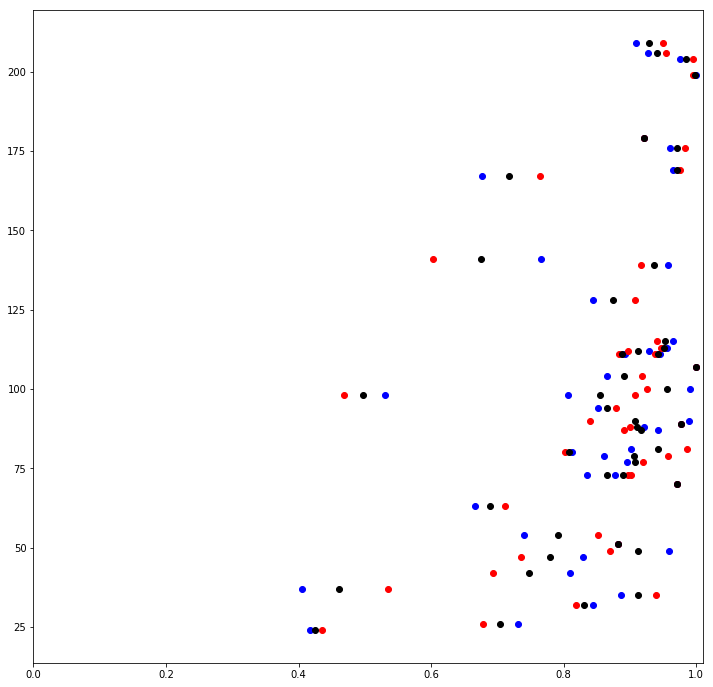

In [320]:
nc = [str(n) + '  ' + m for m,n in zip(names,counts)]

fig, ax = plt.subplots(figsize=(12, 12))
#ax.scatter(accs, counts)
ax.scatter(precision, counts, color='blue')
ax.scatter(recall, counts, color='red')
ax.scatter(fscore, counts, color='black')
#ax.set_yticks(range(0,len(names)))
#ax.set_yticklabels(nc)
ax.set_xlim(0,1.01)
#ax.set_xscale('log')
#ax.set_ylim(-10,1500)

# Don't allow the axis to be on top of your data
#ax.set_axisbelow(True)

# Turn on the minor TICKS, which are required for the minor GRID
#ax.minorticks_on()

# Customize the major grid
#ax.grid(which='major', linestyle='-', linewidth='0.5', color='grey', axis='y')
# Customize the minor grid
#ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
#plt.savefig('count_vs_acc.png', dpi=300)
plt.show()

In [321]:
! pwd

/host/Code/deep_ifcb/python


Text(0.5, 331.09999999999985, 'Predicted label')

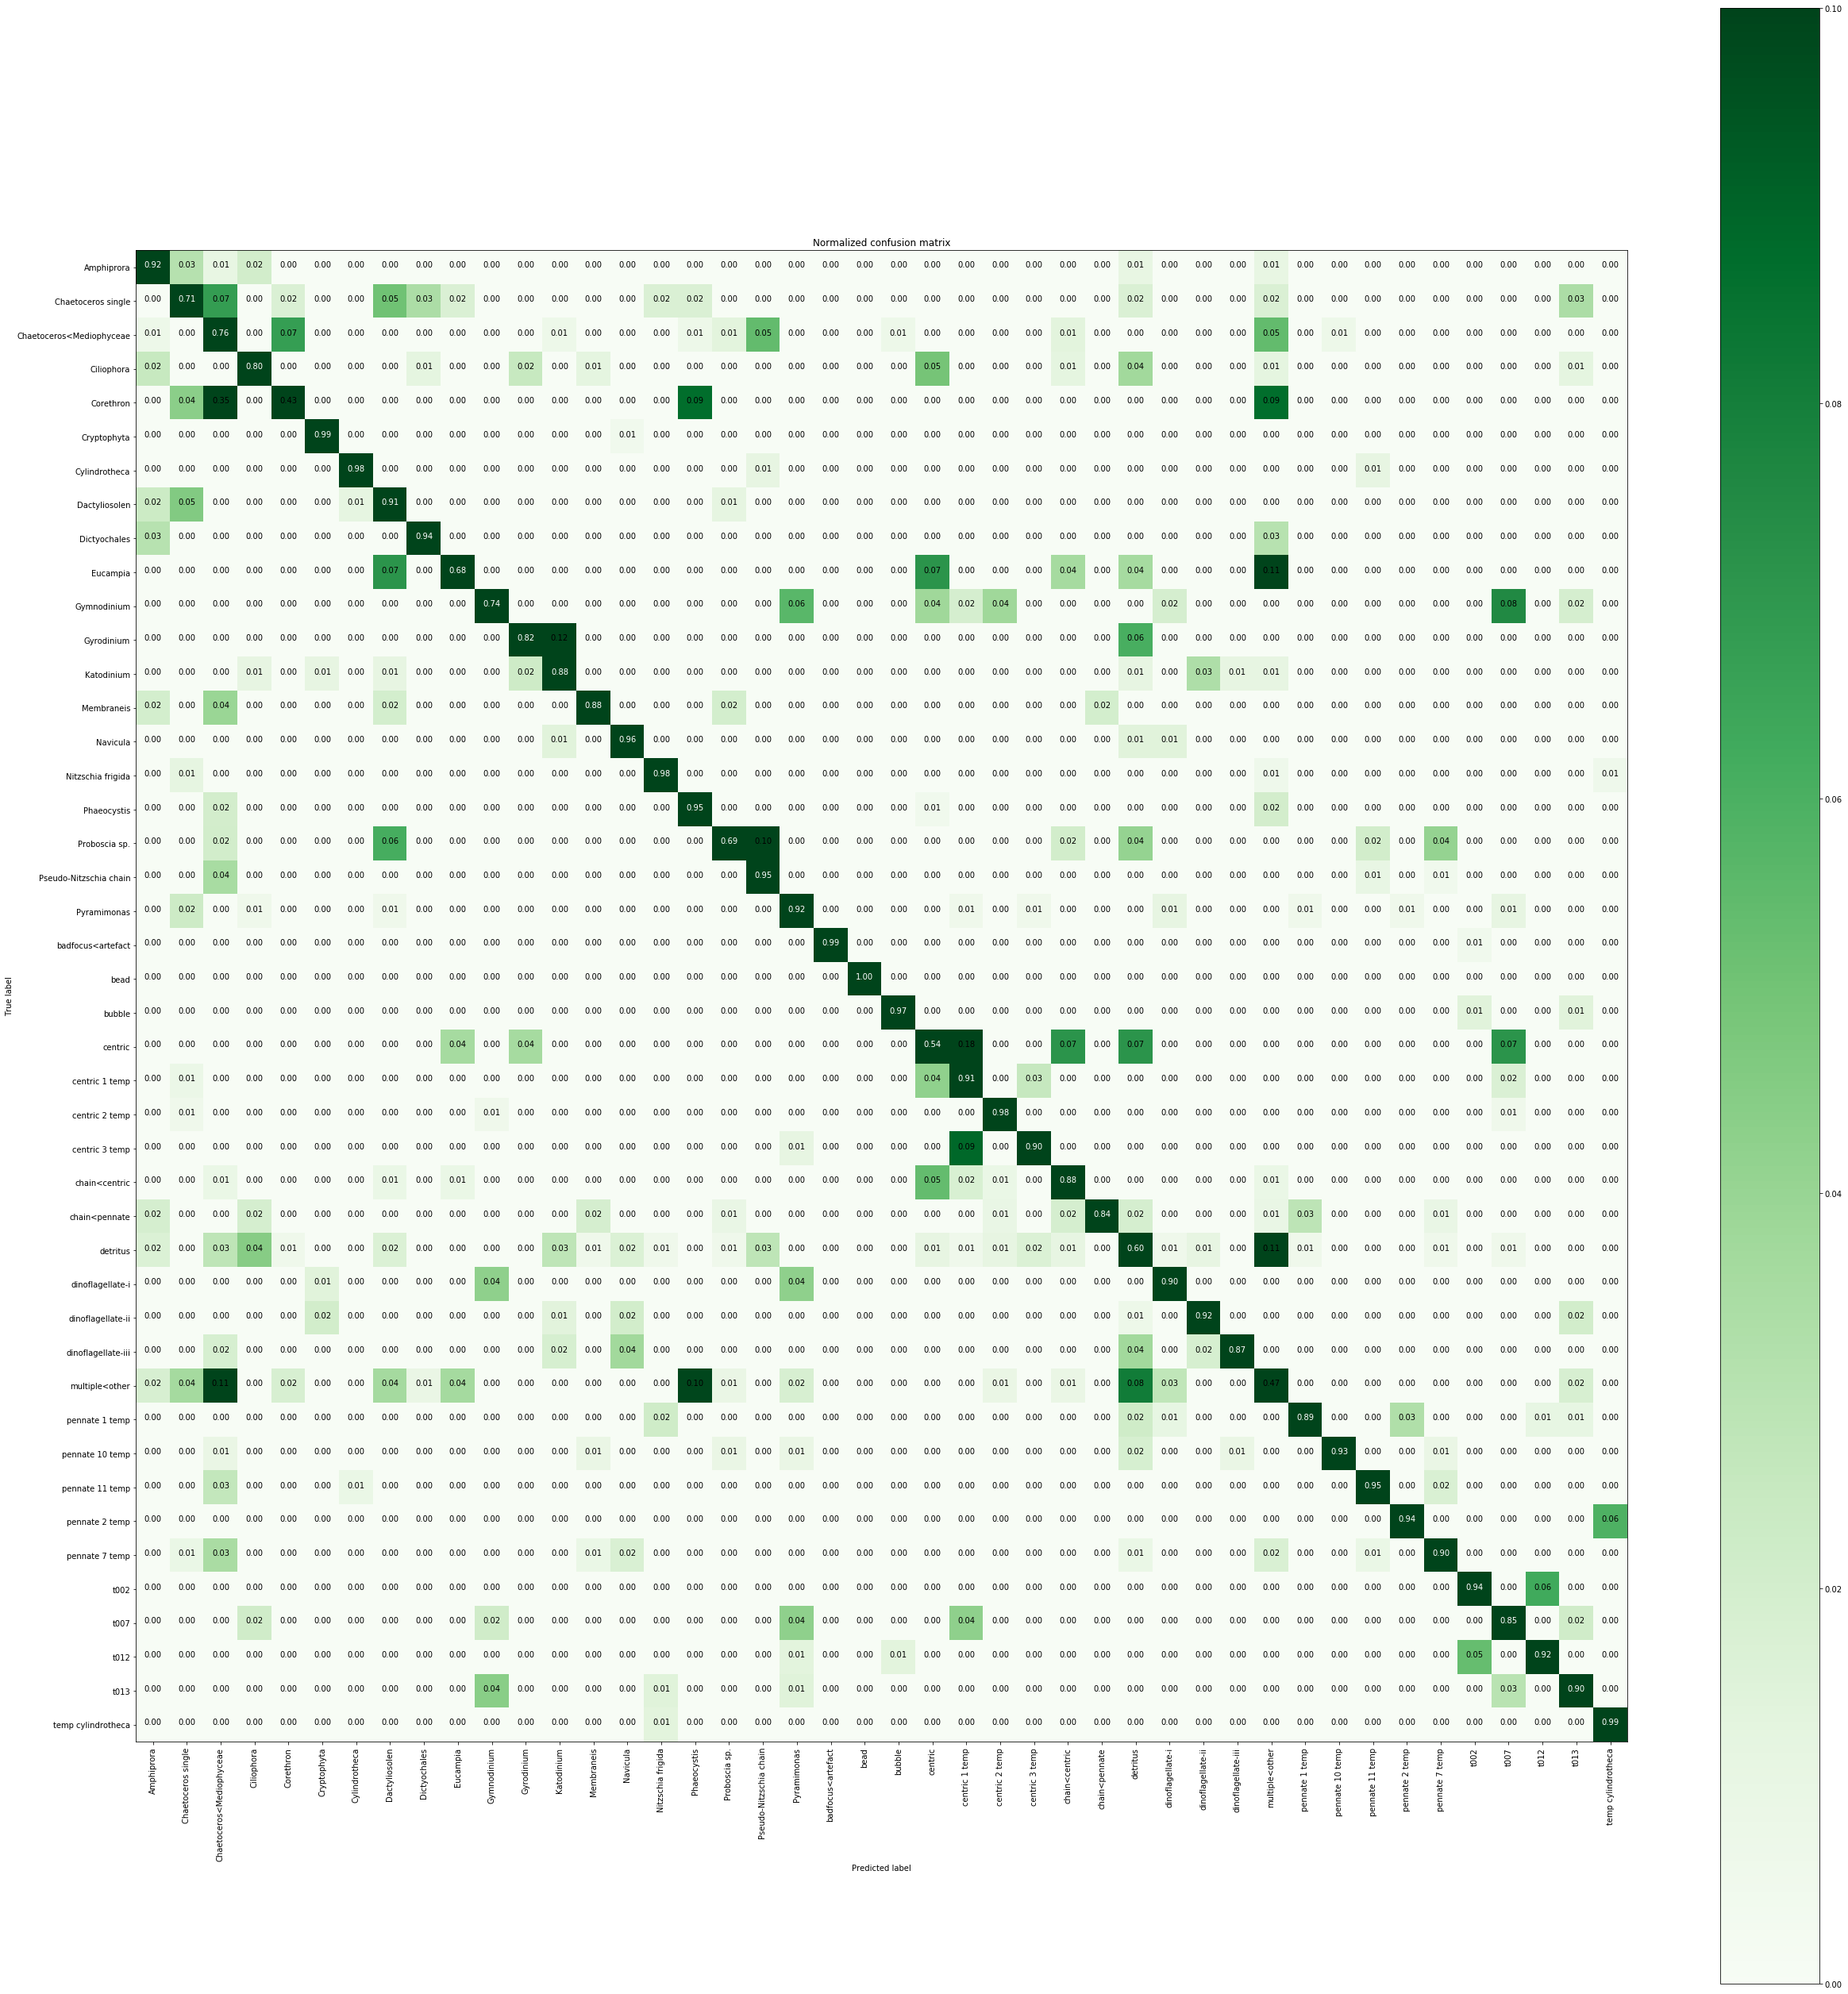

In [322]:
from sklearn.metrics import confusion_matrix
import itertools

num_classes = len(class_id_dict)

cm = confusion_matrix(np.array(all_labs), np.array(all_preds))
cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

# print(cm)
plt.figure(figsize=(35,35)) 

plt.imshow(cm, cmap = 'Greens', vmax=0.1)
plt.title('Normalized confusion matrix')
plt.colorbar()
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, [id_class_dict[i] for i in range(len(id_class_dict))], rotation=90)
plt.yticks(tick_marks, [id_class_dict[i] for i in range(len(id_class_dict))])

fmt = '.2f'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
#plt.axis('off')
#plt.grid(b=None, which='major', axis='both')

#plt.savefig('conf_matrix_unmerged_visible_low_end_large.png', dpi=300)

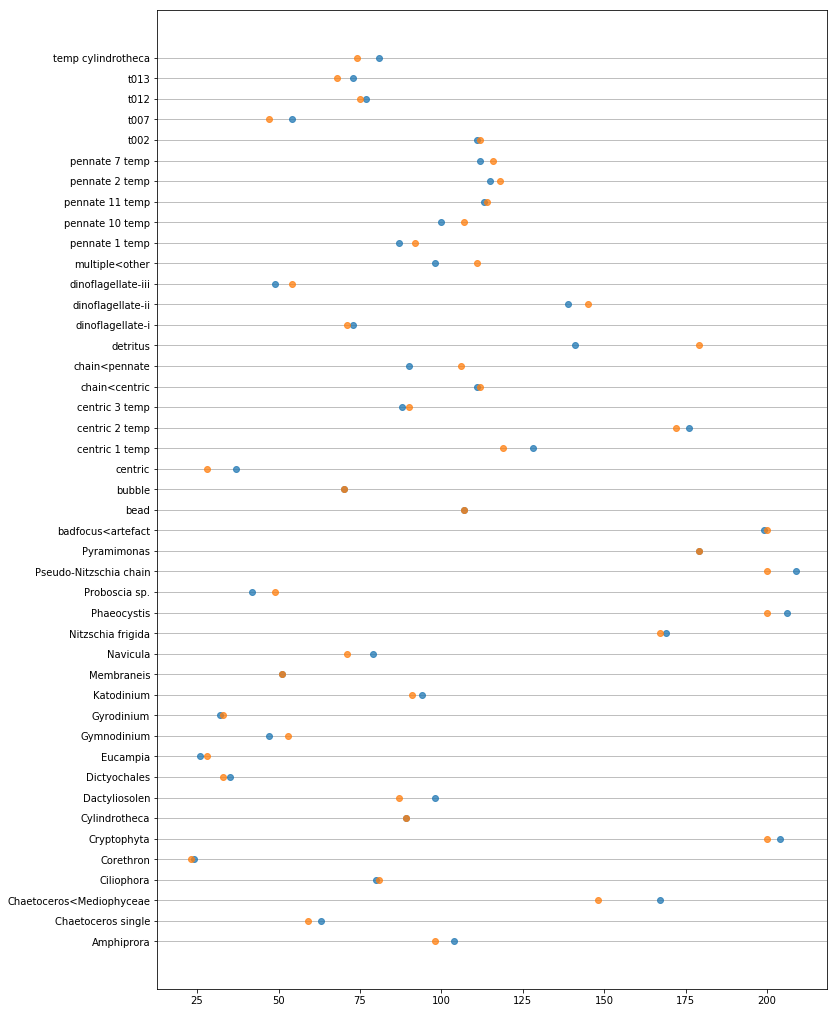

In [323]:
fig, ax = plt.subplots(figsize=(12, 18))
ax.scatter(filled_counts, range(0,len(id_class_dict)), alpha=0.75)
ax.scatter(filled_true_counts, range(0,len(id_class_dict)), alpha=0.75)
ax.set_yticks(range(0,len(id_class_dict)))
ax.set_yticklabels([id_class_dict[i] for i in range(len(id_class_dict))])
#ax.set_xlim(0,500)
#ax.set_xscale('log')

# Don't allow the axis to be on top of your data
ax.set_axisbelow(True)

# Turn on the minor TICKS, which are required for the minor GRID
#ax.minorticks_on()

# Customize the major grid
ax.grid(which='major', linestyle='-', linewidth='0.5', color='grey', axis='y')
# Customize the minor grid
#ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

### Convert the labels to the merged labels

Find the merged class name corresponding to the individual class name it was classified into

In [324]:
lab

43

In [325]:
id_class_dict[0]

'Amphiprora'

In [328]:
merged_labs_truth = []
for lab in all_labs:
    for i in range(len(classes)):
        if id_class_dict[lab] in classes[i]: 
            merged_labs_truth.append(class_names[i])

In [329]:
merged_labs = []
for lab in all_preds:
    for i in range(len(classes)):
        if id_class_dict[lab] in classes[i]: 
            merged_labs.append(class_names[i])


In [330]:
len(all_labs), len(merged_labs_truth), len(merged_labs)

(4427, 4427, 4427)

In [331]:
class_id_list = [[x, i] for i, x in enumerate(class_names)]
class_id_dict = {key: value for (key, value) in class_id_list}

id_class_dict = dict((v,k) for k,v in class_id_dict.items())

id_class_dict

{0: 'amphiprora',
 1: 'banquisia_belgicae',
 2: 'cylindrotheca',
 3: 'licmophora',
 4: 'nitzschia_frigida',
 5: 'pseudo_nitzschia_chain',
 6: 'unidentified_single_pennate',
 7: 'chaetoceros_mediophyceae',
 8: 'chaetoceros_single',
 9: 'corethron',
 10: 'eucampia_chain',
 11: 'eucampia',
 12: 'dactyliosolen',
 13: 'odontella ',
 14: 'proboscia',
 15: 'rhizosolenia ',
 16: 'unidentified_single_centric',
 17: 'cryptophyta',
 18: 'gyrodinium',
 19: 'gymnodinium',
 20: 'katodinium',
 21: 'warnowia',
 22: 'dinoflagellate_i',
 23: 'dinoflagellate_ii ',
 24: 'dinoflagellate_iii',
 25: 'dinophyceae',
 26: 'pyramimonas ',
 27: 'phaeocystis',
 28: 'dictyochales ',
 29: 'ciliophora ',
 30: 'tintinnida',
 31: 'unidentified_flagellates',
 32: 'unidentified_living_cells',
 33: 'other'}

In [332]:
merged_labs_id = [class_id_dict[x] for x in merged_labs]
len(merged_labs), len(merged_labs_id)

(4427, 4427)

In [333]:
merged_truth_id = [class_id_dict[x] for x in merged_labs_truth]
len(merged_labs_truth), len(merged_truth_id)

(4427, 4427)

In [334]:
from sklearn.metrics import precision_recall_fscore_support

precision_recall_fscore_support(np.array(merged_truth_id), np.array(merged_labs_id), average='weighted', labels=list(id_class_dict.keys()))

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


(0.911203205379619, 0.9096453580302688, 0.9097583704245809, None)

In [335]:
from sklearn.metrics import precision_recall_fscore_support

"""
returns:

precision float (if average is not None) or array of float, shape = [n_unique_labels]
recall float (if average is not None) or array of float, , shape = [n_unique_labels]
fbeta_score float (if average is not None) or array of float, shape = [n_unique_labels]
support None (if average is not None) or array of int, shape = [n_unique_labels]
    The number of occurrences of each label in y_true.
"""

precision, recall, fscore, supports = precision_recall_fscore_support(np.array(merged_truth_id), np.array(merged_labs_id), 
                                average=None, labels=list(id_class_dict.keys()))

In [336]:
names = [id_class_dict[x] for x in list(id_class_dict.keys())]

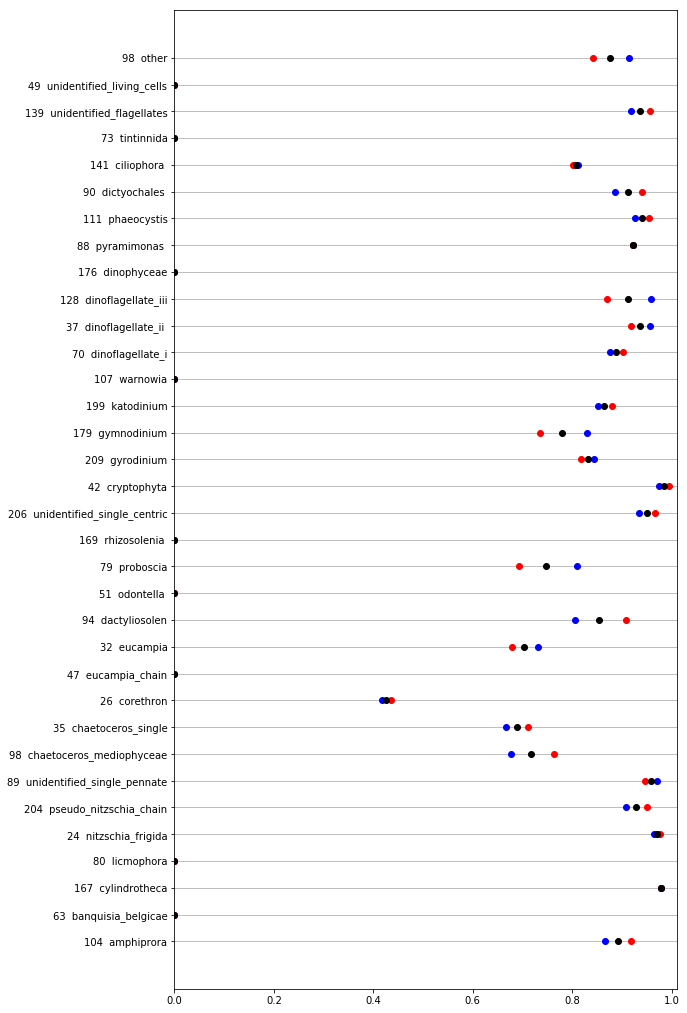

In [337]:
nc = [str(n) + '  ' + m for m,n in zip(names,counts)]

fig, ax = plt.subplots(figsize=(9, 18))
ax.scatter(precision, names, color='blue')
ax.scatter(recall, names, color='red')
ax.scatter(fscore, names, color='black')
ax.set_yticks(range(0,len(names)))
ax.set_yticklabels(nc)
ax.set_xlim(0,1.01)
#ax.set_xscale('log')

# Don't allow the axis to be on top of your data
ax.set_axisbelow(True)

# Turn on the minor TICKS, which are required for the minor GRID
#ax.minorticks_on()

# Customize the major grid
ax.grid(which='major', linestyle='-', linewidth='0.5', color='grey', axis='y')
# Customize the minor grid
#ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
#plt.savefig('merged_class_acc.png', dpi=300)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

num_classes = len(class_id_dict)

cm = confusion_matrix(np.array(merged_labs_id), np.array(merged_truth_id))
cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

# print(cm)
plt.figure(figsize=(15,15)) 

plt.imshow(cm, cmap = 'Greens',vmax=0.2)
plt.title('Normalized confusion matrix')
plt.colorbar()
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, [id_class_dict[i] for i in range(len(id_class_dict))], rotation=90)
plt.yticks(tick_marks, [id_class_dict[i] for i in range(len(id_class_dict))])

fmt = '.1f'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
#plt.axis('off')
#plt.grid(b=None, which='major', axis='both')

plt.savefig('conf_matrix_medium_merged.png', dpi=300)